In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Users\Ranga Chari\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
data= pd.read_csv('./all/train.csv')

In [8]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


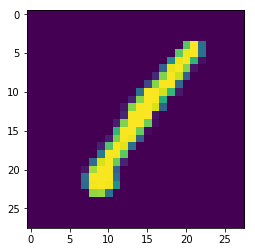

In [18]:
# this line is to show which number is being selected. In the zeroth location you can see a 1 and hence one is being outputed
a = data.iloc[0,1:].values

a = a.reshape(28,28).astype('uint8')

plt.imshow(a)

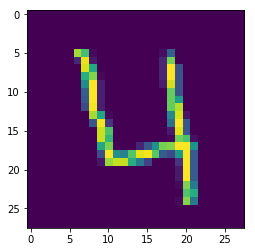

In [19]:
b = data.iloc[3,1:].values

b = b.reshape(28,28).astype('uint8')

plt.imshow(b)

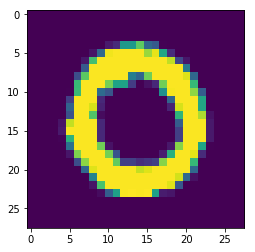

In [20]:
c = data.iloc[1,1:].values

c = c.reshape(28,28).astype('uint8')

plt.imshow(c)

In [40]:
df_x= data.iloc[:,1:]
df_y=data.iloc[:,0]

In [41]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [42]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y_train.head()

32576    5
34735    0
3476     3
27750    0
16211    3
Name: label, dtype: int64

In [58]:
# number of decision tree defined in this case is 100
rf= RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
pred = rf.predict(x_test)

In [46]:
pred

array([0, 4, 0, ..., 0, 3, 1], dtype=int64)

In [60]:
#prediction Values
y_test.values

array([0, 4, 0, ..., 0, 3, 1], dtype=int64)

In [64]:
s = y_test.values
count = 0

In [65]:
for i in range(len(pred)):
    # if prediction is same as test value the count would be incremented
    if pred[i]==s[i]:
        count = count+1

In [66]:
count

8071

In [67]:
len(pred)

8400

In [68]:
acc = count/len(pred)

In [69]:
acc

0.9608333333333333